## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [3]:
nlp = spacy.load("en_core_web_sm")

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [4]:
json_pd = pd.read_json("./complaints-2021-05-14_08_16.json")
print(json_pd)

                    _index      _type      _id  _score  \
0      complaint-public-v2  complaint  3211475       0   
1      complaint-public-v2  complaint  3229299       0   
2      complaint-public-v2  complaint  3199379       0   
3      complaint-public-v2  complaint  2673060       0   
4      complaint-public-v2  complaint  3203545       0   
...                    ...        ...      ...     ...   
78308  complaint-public-v2  complaint  3105617       0   
78309  complaint-public-v2  complaint  3091984       0   
78310  complaint-public-v2  complaint  3133355       0   
78311  complaint-public-v2  complaint  3110963       0   
78312  complaint-public-v2  complaint  2001189       0   

                                                 _source  
0      {'tags': None, 'zip_code': '90301', 'complaint...  
1      {'tags': 'Servicemember', 'zip_code': '319XX',...  
2      {'tags': None, 'zip_code': '77069', 'complaint...  
3      {'tags': None, 'zip_code': '48066', 'complaint...  
4      {

In [5]:
df_main = pd.DataFrame(json_pd)
df_main.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [6]:
df_main["_source"][0]

{'tags': None,
 'zip_code': '90301',
 'complaint_id': '3211475',
 'issue': 'Attempts to collect debt not owed',
 'date_received': '2019-04-13T12:00:00-05:00',
 'state': 'CA',
 'consumer_disputed': 'N/A',
 'product': 'Debt collection',
 'company_response': 'Closed with explanation',
 'company': 'JPMORGAN CHASE & CO.',
 'submitted_via': 'Web',
 'date_sent_to_company': '2019-04-13T12:00:00-05:00',
 'company_public_response': None,
 'sub_product': 'Credit card debt',
 'timely': 'Yes',
 'complaint_what_happened': '',
 'sub_issue': 'Debt is not yours',
 'consumer_consent_provided': 'Consent not provided'}

In [7]:
df_main = pd.concat([df_main, pd.json_normalize(df_main["_source"])], axis = 1)

In [8]:
df_main.drop(["_source"], inplace=True, axis=1)

## Data preparation

In [9]:
# Inspect the dataframe to understand the given data.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _index                     78313 non-null  object
 1   _type                      78313 non-null  object
 2   _id                        78313 non-null  int64 
 3   _score                     78313 non-null  int64 
 4   tags                       10900 non-null  object
 5   zip_code                   71556 non-null  object
 6   complaint_id               78313 non-null  object
 7   issue                      78313 non-null  object
 8   date_received              78313 non-null  object
 9   state                      76322 non-null  object
 10  consumer_disputed          78313 non-null  object
 11  product                    78313 non-null  object
 12  company_response           78313 non-null  object
 13  company                    78313 non-null  object
 14  submit

In [10]:
df_main.shape

(78313, 22)

In [11]:
#print the column names
df_main.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [12]:
df_main.isna().sum()

_index                           0
_type                            0
_id                              0
_score                           0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

In [13]:
df_main.head()

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [14]:
#Assign new column names
df_main.columns = ['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']

In [15]:
df_main.isna().sum()

index                            0
type                             0
id                               0
score                            0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

In [16]:
#Assign nan in place of blanks in the complaints column
df_main[df_main.loc[:, 'complaint_what_happened']=='']=np.nan

In [17]:
#Remove all rows where complaints column is nan
df_main = df_main[~df_main['complaint_what_happened'].isnull()]

In [18]:
df_main.shape

(21072, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [19]:
def cleanText(text):
    text = text.lower()
    pattern = "[^\\w\\s]"
    text = re.sub(pattern, '', text)
    pattern = "\\w*\\d\\w*"
    text = re.sub(pattern, '', text)
    return text

In [20]:
# Write your function here to clean the text and remove all the unnecessary elements.
df_main_clean = pd.DataFrame(df_main['complaint_what_happened'].apply(cleanText))

In [21]:
df_main_clean

,complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told ...
10,chase card was reported on however fraudulent...
11,on while trying to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...
...,...
78303,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for yrs ive had ch...


In [22]:
#Write your function to Lemmatize the texts
def lemmatize_text(text):
    temp = []
    nlp_txt = nlp(text)
    for token in nlp_txt:
        temp.append(token.lemma_)
    return " ".join(temp)

In [23]:
df_main_clean.head()

,complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told ...
10,chase card was reported on however fraudulent...
11,on while trying to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...


In [24]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_main_clean["complaint_lemmatized"] = df_main_clean["complaint_what_happened"].apply(lemmatize_text)

In [25]:
df_main_clean.head()

,complaint_what_happened,complaint_lemmatized
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...


In [26]:
x = "I upgrade my xxxx xxxx card in and be tell "
for x in nlp(x):
    print(x.text)

I
upgrade
my
xxxx
xxxx
card
in
and
be
tell


In [27]:
#Write your function to extract the POS tags 

def pos_tag(text):
    temp = []
    nlp_text = nlp(text)
    temp = [term.text for term in nlp_text if term.tag_=='NN']
    return " ".join(temp)

df_main_clean["complaint_POS_removed"] =  df_main_clean["complaint_lemmatized"].apply(pos_tag)


In [28]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_main_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,chase card report application identity consent...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,xxxx xxxx ticket offer ticket reward card info...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [29]:
# Write your code here to visualise the data according to the 'Complaint' character length
char_len = [len(text) for text in df_main_clean["complaint_POS_removed"]]

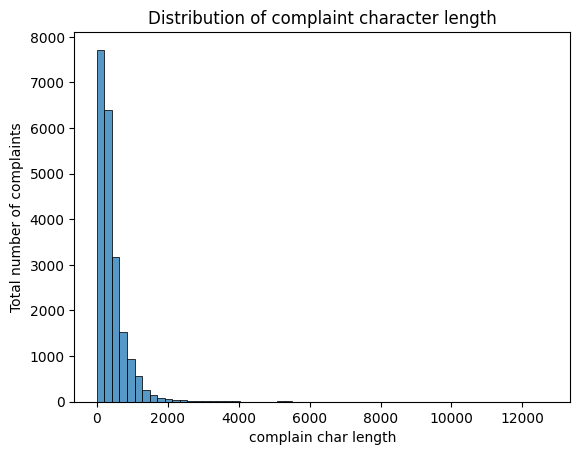

In [30]:
sns.histplot(char_len, bins=60)
plt.xlabel("complain char length")
plt.ylabel("Total number of complaints")
plt.title("Distribution of complaint character length")
plt.show()

In [31]:
from nltk.corpus import stopwords

In [32]:
stop_words = set(stopwords.words('english'))

#### Find the top 40 words by frequency among all the articles after processing the text.

In [33]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size = 60, max_words = 40, background_color="white", random_state=100, stopwords=stopwords)

In [34]:
wordcloud = wordcloud.generate(str(df_main_clean["complaint_POS_removed"]))

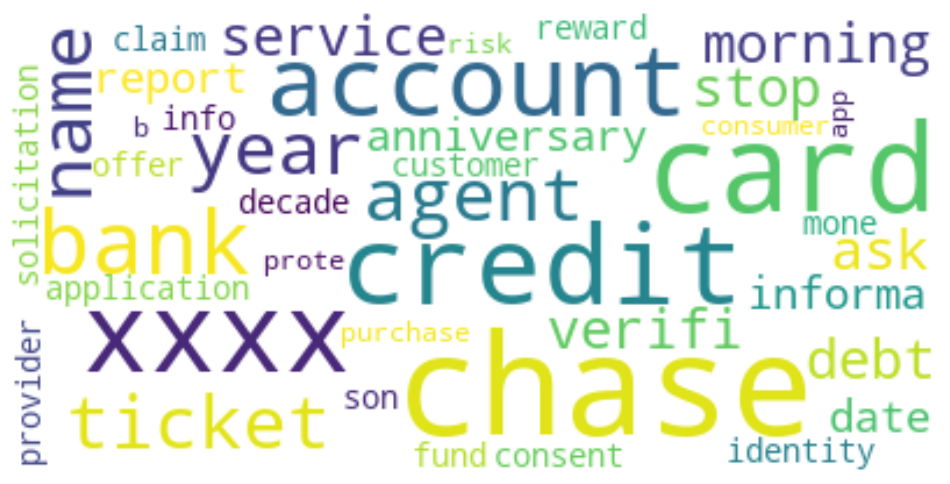

In [35]:
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
#Removing -PRON- from the text corpus
df_main_clean['Complaint_clean'] = df_main_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [37]:
df_main_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...,morning name stop bank service ask debt verifi...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...,xxxx card agent anniversary date agent informa...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,chase card report application identity consent...,chase card report application identity consent...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,xxxx xxxx ticket offer ticket reward card info...,xxxx xxxx ticket offer ticket reward card info...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...


In [38]:
df_main_clean.loc[:1,'Complaint_clean'].tolist()

['morning name stop bank service ask debt verification statement bank debt mail month debt right information consumer chase account xxxx advance help']

In [39]:
vec = CountVectorizer(stop_words = "english", ngram_range = (1,1)).fit(df_main_clean.loc[:1,'Complaint_clean'].tolist())
bagofword = vec.transform(df_main_clean.loc[:1,'Complaint_clean'].tolist())
bagofword.sum(axis=0)

matrix([[1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       dtype=int64)

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [40]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_ngrams(text, n=None, ngram=(1,1)):
    vec = CountVectorizer(stop_words = "english", ngram_range = ngram).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    word_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [41]:
top_30_unigrams = get_top_ngrams(df_main_clean["Complaint_clean"].values.astype('U'), n=30, ngram=(1,1))
df_unigram = pd.DataFrame(top_30_unigrams, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,chase,52757
1,xxxx,48238
2,account,46739
3,credit,33476
4,card,30227
5,bank,21620
6,payment,21163
7,time,16014
8,charge,14154
9,xxxxxxxx,13589


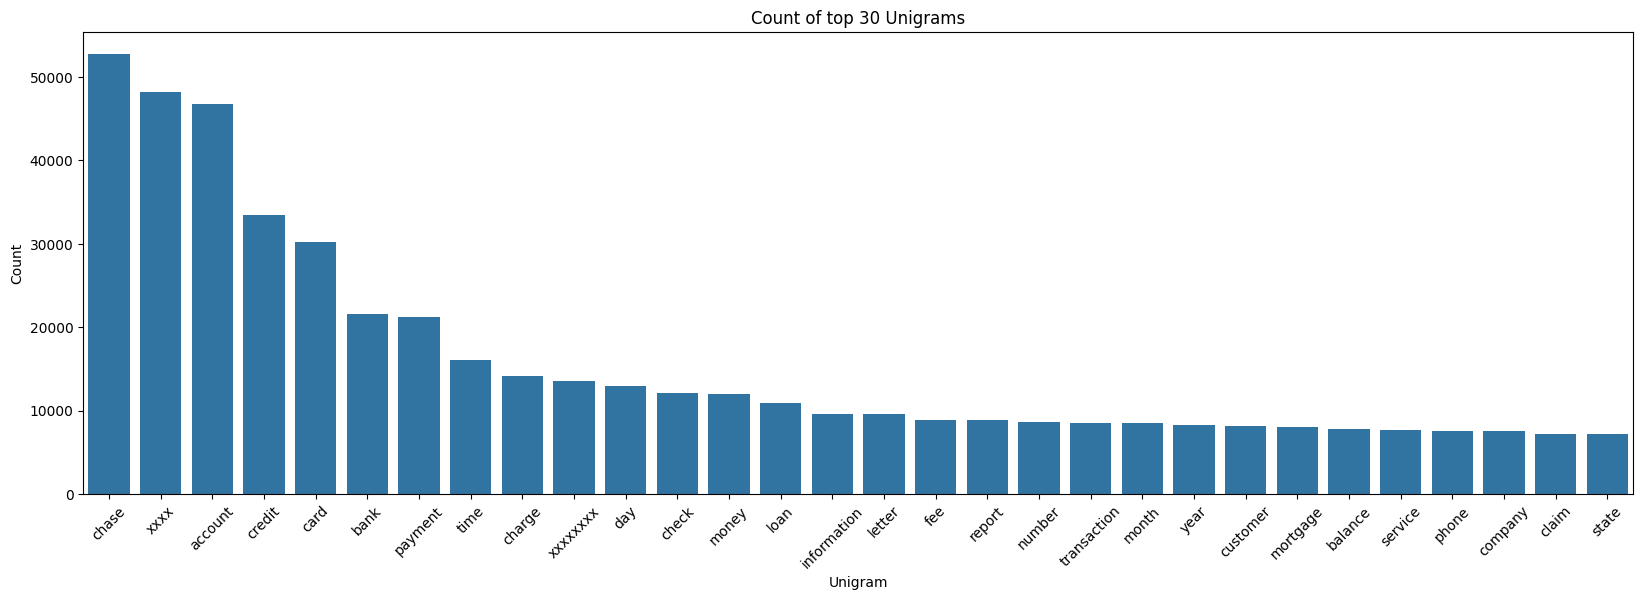

In [42]:
plt.figure(figsize=[20,6])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [43]:
#Print the top 10 words in the unigram frequency
df_unigram.sort_values(by=["count"], ascending=False).head(10)

,unigram,count
0,chase,52757
1,xxxx,48238
2,account,46739
3,credit,33476
4,card,30227
5,bank,21620
6,payment,21163
7,time,16014
8,charge,14154
9,xxxxxxxx,13589


In [44]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_bigrams = get_top_ngrams(df_main_clean["Complaint_clean"].values.astype('U'), n=30, ngram=(2,2))
df_bigrams = pd.DataFrame(top_30_bigrams, columns=["bigram", "count"])
df_bigrams

,bigram,count
0,credit card,12853
1,xxxx xxxx,5247
2,credit report,3930
3,customer service,3058
4,account chase,2939
5,chase credit,2825
6,chase account,2601
7,bank account,2441
8,check account,2293
9,account account,2254


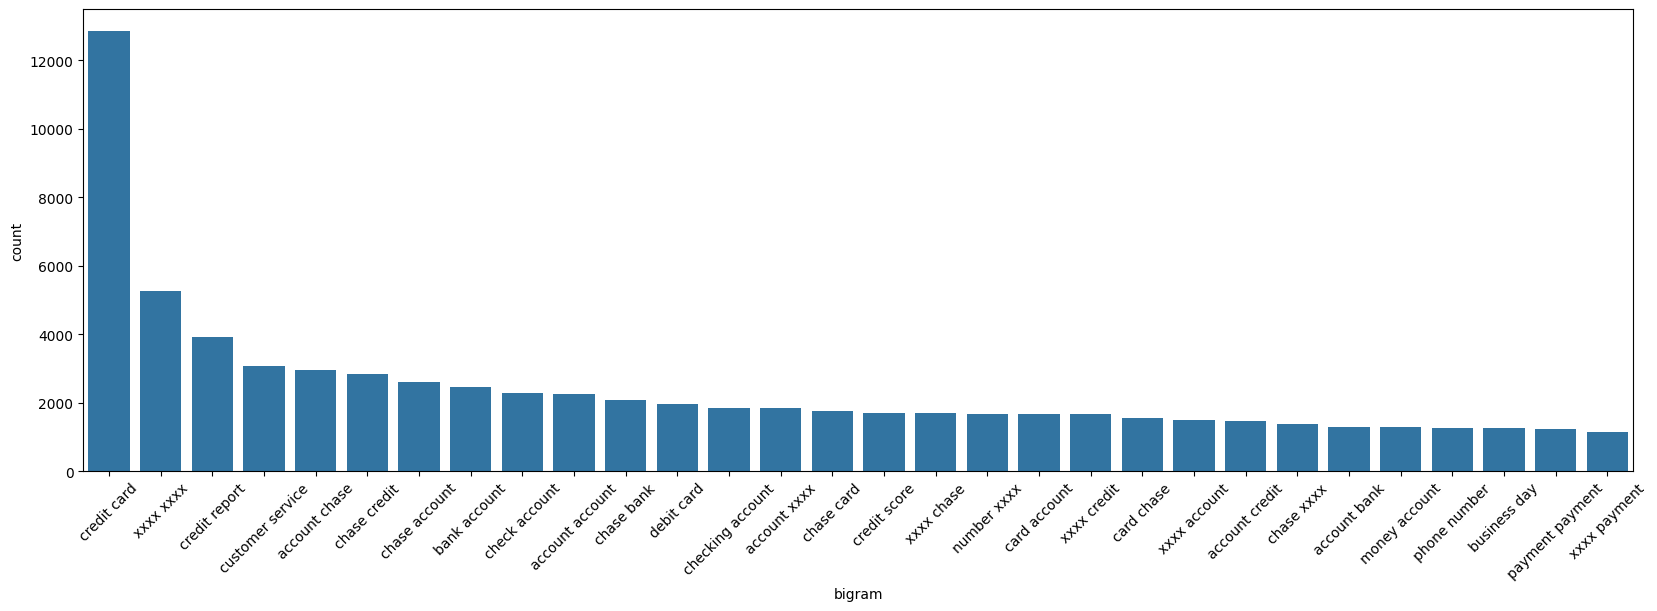

In [45]:
plt.figure(figsize=[20,6])
sns.barplot(df_bigrams, x="bigram", y="count")
plt.xticks(rotation=45)
plt.show()

In [46]:
#Print the top 10 words in the bigram frequency
df_bigrams.sort_values("count", ascending=False).loc[:10, :]

,bigram,count
0,credit card,12853
1,xxxx xxxx,5247
2,credit report,3930
3,customer service,3058
4,account chase,2939
5,chase credit,2825
6,chase account,2601
7,bank account,2441
8,check account,2293
9,account account,2254


In [47]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_trigram = get_top_ngrams(df_main_clean["Complaint_clean"].values.astype('U'), n=30, ngram=(2,2))
df_trigram = pd.DataFrame(top_30_trigram, columns=["trigram", "count"])


In [48]:
#Print the top 10 words in the trigram frequency
df_trigram.sort_values("count", ascending=False).loc[:10, :]

,trigram,count
0,credit card,12853
1,xxxx xxxx,5247
2,credit report,3930
3,customer service,3058
4,account chase,2939
5,chase credit,2825
6,chase account,2601
7,bank account,2441
8,check account,2293
9,account account,2254


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [49]:
df_main_clean['Complaint_clean'] = df_main_clean['Complaint_clean'].str.replace('xxxx','')

In [51]:
#All masked texts has been removed
df_main_clean.shape

(21072, 4)

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [53]:
#Write your code here to initialise the TfidfVectorizer 

tfidf_df = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [54]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf_df.fit_transform(df_main_clean["Complaint_clean"])

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [55]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [56]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40, max_iter=500)

In [57]:
nmf_model.fit(dtm)
len(tfidf_df.get_feature_names_out())

6780

In [58]:
#Print the Top15 words for each of the topics
words = np.array(tfidf_df.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i+1}' for i in range(num_topics)], columns=[f'Word {i+1}' for i in range(15)]).astype(str)

In [59]:
topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
H = nmf_model.components_

In [61]:
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,chase,deposit,branch,day,checking,number,business,transfer,transaction,customer
Topic 2,card,credit,chase,balance,account,limit,score,year,point,month,purchase,offer,application,service,time
Topic 3,payment,loan,mortgage,chase,home,month,modification,time,year,rate,property,balance,statement,date,letter
Topic 4,report,inquiry,credit,company,information,reporting,debt,identity,account,theft,score,letter,date,file,creditor
Topic 5,charge,dispute,transaction,chase,fee,merchant,claim,fraud,purchase,service,email,refund,time,company,day


In [62]:
topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,fund,chase,deposit,branch,day,checking,number,business,transfer,transaction,customer
Topic 2,card,credit,chase,balance,account,limit,score,year,point,month,purchase,offer,application,service,time
Topic 3,payment,loan,mortgage,chase,home,month,modification,time,year,rate,property,balance,statement,date,letter
Topic 4,report,inquiry,credit,company,information,reporting,debt,identity,account,theft,score,letter,date,file,creditor
Topic 5,charge,dispute,transaction,chase,fee,merchant,claim,fraud,purchase,service,email,refund,time,company,day


In [63]:
H[i].argsort()[::-1][:15]

array([ 980, 1910, 6290,  994, 2392, 3746, 1073, 2568, 4800, 5501, 2083,
       5029, 6184, 1206, 1593], dtype=int64)

In [64]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_results = nmf_model.transform(dtm)

In [72]:
#Assign the best topic to each of the cmplaints in Topic Column

df_main_clean['Topic'] = topic_results.argmax(axis=1)

In [73]:
df_main_clean['Topic'].value_counts()

Topic
0    5155
2    5138
4    4455
1    4069
3    2255
Name: count, dtype: int64

In [74]:
#Print the first 5 Complaint for each of the Topics
df_main_clean_5=df_main_clean.groupby('Topic').head(5)
df_main_clean_5.sort_values('Topic')

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...,morning name stop bank service ask debt verifi...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account chase auto xxxx,mishandle account chase auto,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,notice account debit card branch customer serv...,notice account debit card branch customer serv...,0
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code bonus xxxxxxxx term everythi...,account bank code bonus term everything accou...,0
32,my chase amazon card was declined for a cateri...,my chase amazon card be decline for a catering...,chase card decline catering order place brothe...,chase card decline catering order place brothe...,1
59,i currently have over xxxx chase ultimate rewa...,I currently have over xxxx chase ultimate rewa...,chase reward point month reward account bonus ...,chase reward point month reward account bonus ...,1
52,my roommate was stealing my chase debit card a...,my roommate be steal my chase debit card and d...,roommate chase debit card driver license money...,roommate chase debit card driver license money...,1
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
50,i am a senior citizen that has been scammed by...,I be a senior citizen that have be scamme by s...,citizen company time share company nothing ref...,citizen company time share company nothing ref...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [75]:
#Create the dictionary of Topic names and Topics

Topic_names = {  0:'Bank Account services', 2:'Mortgage/Loan', 1:'Theft/Dispute Reporting', 3:'Others', 4:'Credit card or prepaid card' }
#Replace Topics with Topic Names
df_main_clean['Topic'] = df_main_clean['Topic'].map(Topic_names)

In [76]:
df_main_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...,morning name stop bank service ask debt verifi...,Bank Account services
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,Theft/Dispute Reporting
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,chase card report application identity consent...,chase card report application identity consent...,Others
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,Others
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,Bank Account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Theft/Dispute Reporting
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,Credit card or prepaid card
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...,risk consumer chase bank app chase year banki...,Credit card or prepaid card
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,Theft/Dispute Reporting


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [78]:
#Create the dictionary again of Topic names and Topics

Topic_names = {  'Bank Account services':0, 'Mortgage/Loan':2, 'Theft/Dispute Reporting':1, 'Others':3, 'Credit card or prepaid card':4  }
#Replace Topics with Topic Names
df_main_clean['Topic'] = df_main_clean['Topic'].map(Topic_names)

In [79]:
df_main_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank service ask debt verifi...,morning name stop bank service ask debt verifi...,0
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,xxxx card agent anniversary date agent informa...,card agent anniversary date agent information...,1
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,chase card report application identity consent...,chase card report application identity consent...,3
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,3
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,xxxx credit card provider claim purchase prote...,credit card provider claim purchase protectio...,4
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,xxxx risk consumer chase bank app chase year b...,risk consumer chase bank app chase year banki...,4
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,1


In [80]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_main_clean[['complaint_what_happened', 'Topic']]

In [81]:
training_data

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in and was told ...,1
10,chase card was reported on however fraudulent...,3
11,on while trying to book a xxxx xxxx ticket ...,3
14,my grand son give me check for i deposit it i...,0
...,...,...
78303,after being a chase card customer for well ove...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,4
78310,i am not familiar with xxxx pay and did not un...,4
78311,i have had flawless credit for yrs ive had ch...,1


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [83]:
import pickle

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:

#Write your code to get the Vector count
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['complaint_what_happened'])

# Save word vector
pickle.dump(vect.vocabulary_, open("count_vector.pkl", "wb"))

#Write your code here to transform the word vector to tf-idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pkl', "wb"))

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [88]:
# Write your code here to build any 3 models and evaluate them using the required metrics


from sklearn.linear_model import LogisticRegression
# Importing Train, Test Split
from sklearn.model_selection import train_test_split


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [90]:
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [91]:
logreg.score(X_test, y_test)

0.9090736522399393

In [92]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


In [97]:
logreg_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
logreg_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [98]:
logreg_hpt.best_params_

{'C': 4, 'solver': 'liblinear'}

In [99]:
logreg_hpt.score(X_test, y_test)

0.9111617312072893

In [102]:
pickle.dump(logreg_hpt, open("logreg_model.pkl", "wb"))

In [103]:
logreg_model = pickle.load(open("logreg_model.pkl", "rb"))

In [104]:
y_pred = logreg_model.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred))

[[1202   17   27   10   56]
 [  25  943   11   12   46]
 [  19   12 1205    5   27]
 [  13   28   21  489   12]
 [  59   25   36    7  961]]


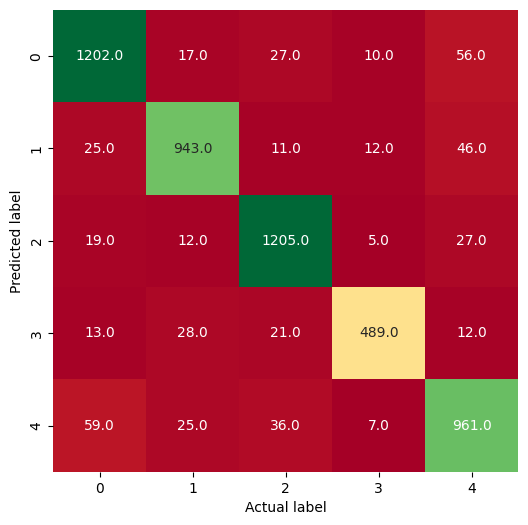

In [106]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [107]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [108]:
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.91      0.92      0.91      1312
Credit card / Prepaid card       0.92      0.91      0.91      1037
                    Others       0.93      0.95      0.94      1268
   Theft/Dispute reporting       0.93      0.87      0.90       563
           Mortgages/loans       0.87      0.88      0.88      1088

                  accuracy                           0.91      5268
                 macro avg       0.91      0.91      0.91      5268
              weighted avg       0.91      0.91      0.91      5268



In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [111]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [112]:
dt.score(X_test, y_test)

0.7594912680334093

In [113]:
dt_grid = {"max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [114]:
dt_hpt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid=dt_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
dt_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [116]:
dt_hpt.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [117]:
dt_hpt.score(X_test, y_test)

0.7456340167046317

In [118]:
pickle.dump(dt_hpt, open("dt_model.pkl", "wb"))

In [119]:
dt_model = pickle.load(open("dt_model.pkl", "rb"))

In [120]:
y_pred = dt_model.predict(X_test)

In [121]:
print(confusion_matrix(y_test, y_pred))

[[1016   72   47   28  149]
 [  29  863    3   50   92]
 [  61   49  983   35  140]
 [  51   53   31  372   56]
 [ 174  138   47   35  694]]


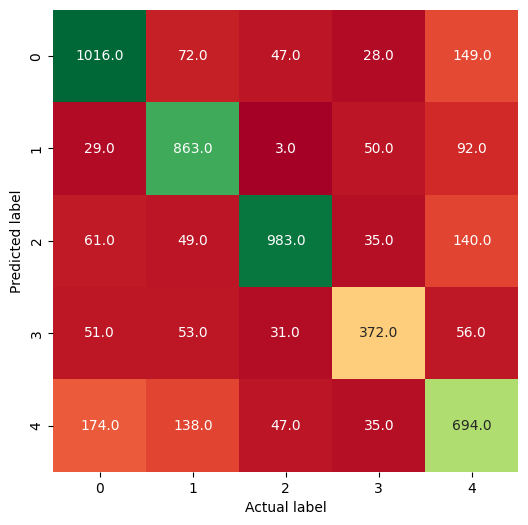

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [123]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [124]:
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.76      0.77      0.77      1312
Credit card / Prepaid card       0.73      0.83      0.78      1037
                    Others       0.88      0.78      0.83      1268
   Theft/Dispute reporting       0.72      0.66      0.69       563
           Mortgages/loans       0.61      0.64      0.63      1088

                  accuracy                           0.75      5268
                 macro avg       0.74      0.74      0.74      5268
              weighted avg       0.75      0.75      0.75      5268



Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [127]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [128]:
rf.score(X_test, y_test)

0.8149202733485194

In [129]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [130]:
rf_hpt = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [131]:
rf_hpt.best_params_

{'n_estimators': 510,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [132]:
rf_hpt.score(X_test, y_test)

0.7281700835231587

In [133]:
rf_grid = {"n_estimators": [200, 260, 300],
           "max_depth": [7, 10, 15],
           "min_samples_split": [10, 12, 14],
           "min_samples_leaf": [6, 8, 10]}

In [134]:
rf_hpt = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [135]:
rf_hpt.best_params_

{'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'n_estimators': 300}

In [136]:
rf_hpt.score(X_test, y_test)

0.7670842824601367

In [137]:
pickle.dump(rf_hpt, open("rf_model.pkl", "wb"))

In [138]:
rf_model = pickle.load(open("rf_model.pkl", "rb"))

In [139]:
# Make predictions on test data
y_pred = rf_model.predict(X_test)

In [140]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[1214   16   60    1   21]
 [ 149  676   85    6  121]
 [  61   39 1151    0   17]
 [  64   77  126  275   21]
 [ 221   40  102    0  725]]


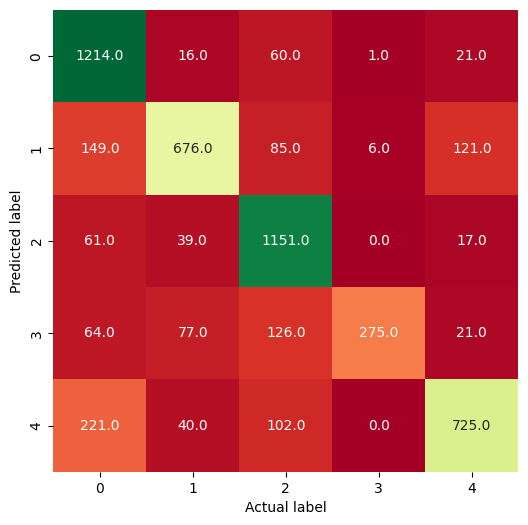

In [141]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [142]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [143]:
# Print Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.71      0.93      0.80      1312
Credit card / Prepaid card       0.80      0.65      0.72      1037
                    Others       0.76      0.91      0.82      1268
   Theft/Dispute reporting       0.98      0.49      0.65       563
           Mortgages/loans       0.80      0.67      0.73      1088

                  accuracy                           0.77      5268
                 macro avg       0.81      0.73      0.74      5268
              weighted avg       0.79      0.77      0.76      5268

